In [7]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [11]:
model = InceptionV3(weights='imagenet',include_top=True)

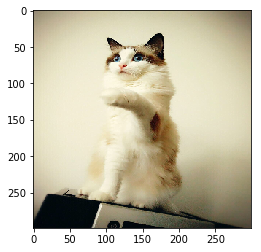

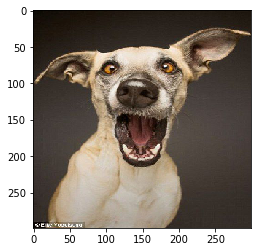

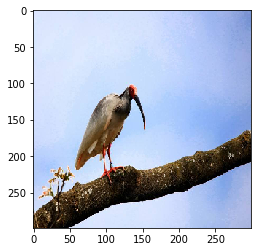

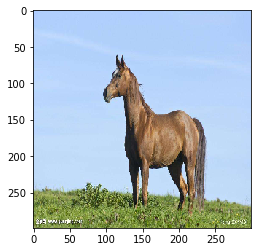

In [8]:
img_names = ['cat.jpg','dog.jpg','bird.jpg','horse.jpg']
ims = [image.load_img(img_path, target_size=(299, 299)) for img_path in img_names]
for im in ims:
    plt.imshow(im)
    plt.show()

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 


average_pooling2d_10 (AveragePo (None, None, None, 1 0           max_pooling2d_6[0][0]            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, None, None, 6 12288       max_pooling2d_6[0][0]            
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, None, None, 6 76800       activation_101[0][0]             
__________________________________________________________________________________________________
conv2d_105 (Conv2D)             (None, None, None, 9 82944       activation_104[0][0]             
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, None, None, 3 6144        average_pooling2d_10[0][0]       
__________________________________________________________________________________________________
batch_nor

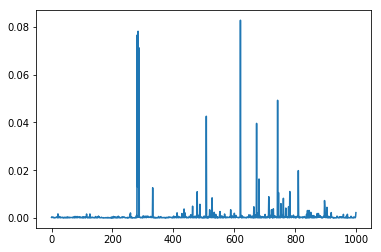

[('n03642806', 'laptop', 0.082774542), ('n02123597', 'Siamese_cat', 0.078170657), ('n02123045', 'tabby', 0.076575182)]


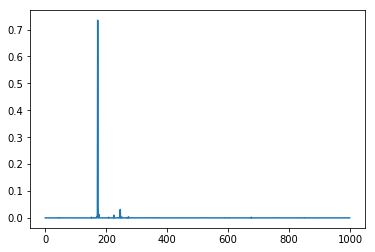

[('n02091134', 'whippet', 0.73451376), ('n02091244', 'Ibizan_hound', 0.033086296), ('n02109047', 'Great_Dane', 0.031450763)]


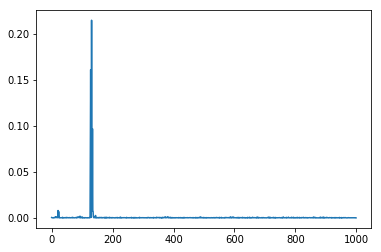

[('n02009229', 'little_blue_heron', 0.21454594), ('n02002724', 'black_stork', 0.16085315), ('n02012849', 'crane', 0.096803546)]


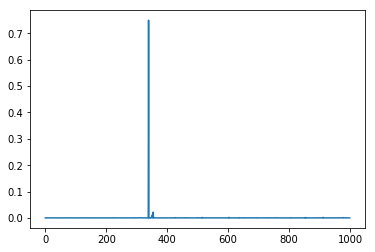

[('n02389026', 'sorrel', 0.74993342), ('n02437312', 'Arabian_camel', 0.022042682), ('n02422106', 'hartebeest', 0.01053345)]


In [13]:
images = [np.expand_dims(image.img_to_array(im), axis=0) for im in ims]
images = [preprocess_input(image) for image in images]
res = [model.predict(image) for image in images]
for r in res:
    plt.plot(r.ravel())
    plt.show()
    print(decode_predictions(r, top=3)[0])